In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
from datetime import datetime as dt
import seaborn as sns

In [4]:
path="D:/Games/Aastha/archive (1)/iBeacon_RSSI_Labeled.csv"
data = pd.read_csv(path, index_col=None)
data.head(5)

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


## Data Exploration

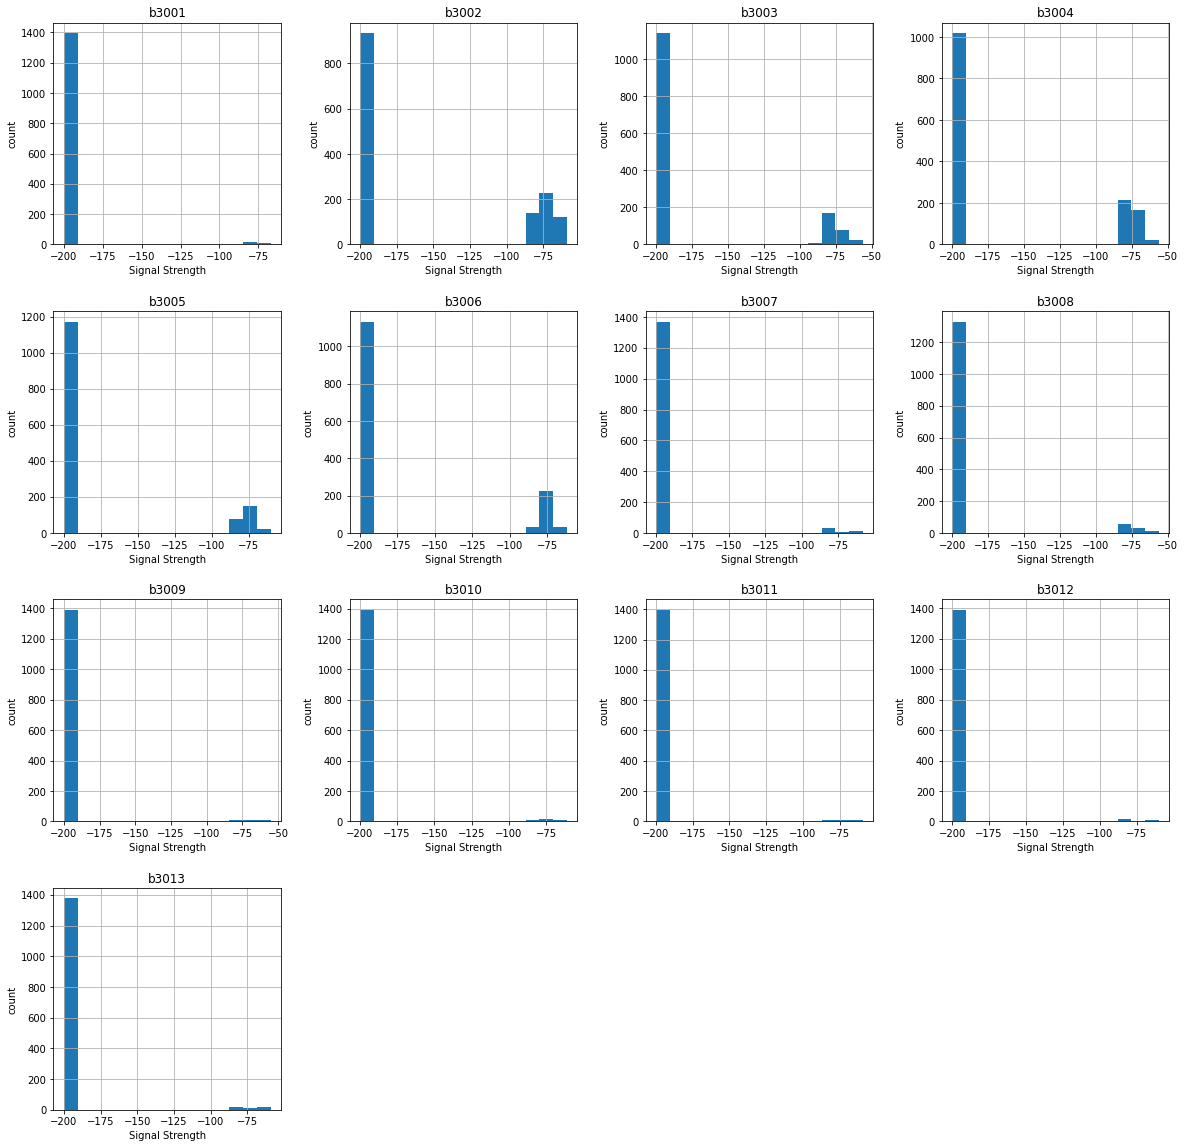

In [5]:
plots = data.hist(bins=15, figsize=(20,20))

for ax in plots.flatten():
    ax.set_xlabel("Signal Strength")
    ax.set_ylabel("count")

C:\Users\coder\AppData\Local\Temp\ipykernel_26076\73986679.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='kendall'), ax=ax)


<AxesSubplot: >

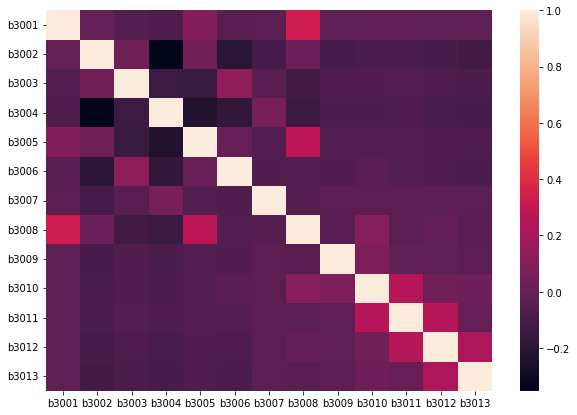

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(method='kendall'), ax=ax)

From the above co-relation heat-map, we can observe that the difference in the colors is high on the top left and on the bottom right while the bottom left and the top right are fairly the same. If we observe the layout of the library (supplied) where the data was collected, we can see that the overlap of the signals is directly proportional to the distance by which they are kept apart. 
![title](../input/ble-rssi-dataset/iBeacon_Layout.jpg)

## Data Preparation

In [7]:
data.max()

location                   W15
date        9-27-2016 12:38:58
b3001                      -67
b3002                      -59
b3003                      -56
b3004                      -56
b3005                      -60
b3006                      -62
b3007                      -58
b3008                      -56
b3009                      -55
b3010                      -61
b3011                      -59
b3012                      -60
b3013                      -59
dtype: object

Max signal strength has been observed from beacon #9 with -55dBm. It is to be noted that in real life, the signal strength might not be a constant and depends on various factors like temperature, humidity, etc. in the medium. 

For the preparation part, we shall do the following:

1) Bin the data between -50dBm and -200dBm in bin ranges of 10. It is to be noted that there we will no values for some bins as observed from the plots in the data exploration phase.<br>
2) The location feature is a combination of both the x-axis and y-axis information. i.e. The alphabet in the location is an axis point on the x-coordinate and the number an axis point in the y-coordinate. We split them into two features: x and y. Then, drop the location feature.<br>
3) Label encode the split location features (x and y) using sklearn's LabelEncoder thus transforming the values between 0 and n_classes-1.<br>
4) Drop the date feature.

In [8]:
label = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]
for col in data.select_dtypes(include="number").columns:
    data[col] = pd.cut(data[col], bins = 15, labels = label)
    
# Splitting the location:
data['x'] = data['location'].str[0]
data['y'] = data['location'].str[1:]

# Label Encoding
from sklearn.preprocessing import LabelEncoder
data['x'] = LabelEncoder().fit_transform(data['x'])
data['y'] = LabelEncoder().fit_transform(data['y'])

# Dropping the columns
data = data.drop(columns=["date","location"])

data.head(5)

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013,x,y
0,1,1,1,1,1,14,1,1,1,1,1,1,1,10,1
1,1,1,1,1,1,14,1,1,1,1,1,1,1,11,0
2,1,1,1,1,1,14,1,1,1,1,1,1,1,11,0
3,1,1,1,1,1,14,1,1,1,1,1,1,1,11,0
4,1,1,1,1,1,14,1,1,1,1,1,1,1,11,0


One-hot encoding the descriptive features and separating the target features

In [9]:
data = pd.get_dummies(data, columns=data.columns[0:-2])
data.head(5)

,x,y,b3001_1,b3001_2,b3001_3,b3001_4,b3001_5,b3001_6,b3001_7,b3001_8,b3001_9,b3001_10,b3001_11,b3001_12,b3001_13,b3001_14,b3001_15,b3002_1,b3002_2,b3002_3,b3002_4,b3002_5,b3002_6,b3002_7,b3002_8,b3002_9,b3002_10,b3002_11,b3002_12,b3002_13,b3002_14,b3002_15,b3003_1,b3003_2,b3003_3,b3003_4,b3003_5,b3003_6,b3003_7,b3003_8,b3003_9,b3003_10,b3003_11,b3003_12,b3003_13,b3003_14,b3003_15,b3004_1,b3004_2,b3004_3,b3004_4,b3004_5,b3004_6,b3004_7,b3004_8,b3004_9,b3004_10,b3004_11,b3004_12,b3004_13,b3004_14,b3004_15,b3005_1,b3005_2,b3005_3,b3005_4,b3005_5,b3005_6,b3005_7,b3005_8,b3005_9,b3005_10,b3005_11,b3005_12,b3005_13,b3005_14,b3005_15,b3006_1,b3006_2,b3006_3,b3006_4,b3006_5,b3006_6,b3006_7,b3006_8,b3006_9,b3006_10,b3006_11,b3006_12,b3006_13,b3006_14,b3006_15,b3007_1,b3007_2,b3007_3,b3007_4,b3007_5,b3007_6,b3007_7,b3007_8,b3007_9,b3007_10,b3007_11,b3007_12,b3007_13,b3007_14,b3007_15,b3008_1,b3008_2,b3008_3,b3008_4,b3008_5,b3008_6,b3008_7,b3008_8,b3008_9,b3008_10,b3008_11,b3008_12,b3008_13,b3008_14,b3008_15,b3009_1,b3009_2,b3009_3,b3009_4,b3009_5,b3009_6,b3009_7,b3009_8,b3009_9,b3009_10,b3009_11,b3009_12,b3009_13,b3009_14,b3009_15,b3010_1,b3010_2,b3010_3,b3010_4,b3010_5,b3010_6,b3010_7,b3010_8,b3010_9,b3010_10,b3010_11,b3010_12,b3010_13,b3010_14,b3010_15,b3011_1,b3011_2,b3011_3,b3011_4,b3011_5,b3011_6,b3011_7,b3011_8,b3011_9,b3011_10,b3011_11,b3011_12,b3011_13,b3011_14,b3011_15,b3012_1,b3012_2,b3012_3,b3012_4,b3012_5,b3012_6,b3012_7,b3012_8,b3012_9,b3012_10,b3012_11,b3012_12,b3012_13,b3012_14,b3012_15,b3013_1,b3013_2,b3013_3,b3013_4,b3013_5,b3013_6,b3013_7,b3013_8,b3013_9,b3013_10,b3013_11,b3013_12,b3013_13,b3013_14,b3013_15
0,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
target_x = data['x']
target_y = data['y']
data.drop(columns=['x','y'], inplace=True)
data.head(5)

,b3001_1,b3001_2,b3001_3,b3001_4,b3001_5,b3001_6,b3001_7,b3001_8,b3001_9,b3001_10,b3001_11,b3001_12,b3001_13,b3001_14,b3001_15,b3002_1,b3002_2,b3002_3,b3002_4,b3002_5,b3002_6,b3002_7,b3002_8,b3002_9,b3002_10,b3002_11,b3002_12,b3002_13,b3002_14,b3002_15,b3003_1,b3003_2,b3003_3,b3003_4,b3003_5,b3003_6,b3003_7,b3003_8,b3003_9,b3003_10,b3003_11,b3003_12,b3003_13,b3003_14,b3003_15,b3004_1,b3004_2,b3004_3,b3004_4,b3004_5,b3004_6,b3004_7,b3004_8,b3004_9,b3004_10,b3004_11,b3004_12,b3004_13,b3004_14,b3004_15,b3005_1,b3005_2,b3005_3,b3005_4,b3005_5,b3005_6,b3005_7,b3005_8,b3005_9,b3005_10,b3005_11,b3005_12,b3005_13,b3005_14,b3005_15,b3006_1,b3006_2,b3006_3,b3006_4,b3006_5,b3006_6,b3006_7,b3006_8,b3006_9,b3006_10,b3006_11,b3006_12,b3006_13,b3006_14,b3006_15,b3007_1,b3007_2,b3007_3,b3007_4,b3007_5,b3007_6,b3007_7,b3007_8,b3007_9,b3007_10,b3007_11,b3007_12,b3007_13,b3007_14,b3007_15,b3008_1,b3008_2,b3008_3,b3008_4,b3008_5,b3008_6,b3008_7,b3008_8,b3008_9,b3008_10,b3008_11,b3008_12,b3008_13,b3008_14,b3008_15,b3009_1,b3009_2,b3009_3,b3009_4,b3009_5,b3009_6,b3009_7,b3009_8,b3009_9,b3009_10,b3009_11,b3009_12,b3009_13,b3009_14,b3009_15,b3010_1,b3010_2,b3010_3,b3010_4,b3010_5,b3010_6,b3010_7,b3010_8,b3010_9,b3010_10,b3010_11,b3010_12,b3010_13,b3010_14,b3010_15,b3011_1,b3011_2,b3011_3,b3011_4,b3011_5,b3011_6,b3011_7,b3011_8,b3011_9,b3011_10,b3011_11,b3011_12,b3011_13,b3011_14,b3011_15,b3012_1,b3012_2,b3012_3,b3012_4,b3012_5,b3012_6,b3012_7,b3012_8,b3012_9,b3012_10,b3012_11,b3012_12,b3012_13,b3012_14,b3012_15,b3013_1,b3013_2,b3013_3,b3013_4,b3013_5,b3013_6,b3013_7,b3013_8,b3013_9,b3013_10,b3013_11,b3013_12,b3013_13,b3013_14,b3013_15
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Modeling

For modeling, since we have two target features, a model each has to be chosen for each of the target features. Since it is classification, KNN and Decision Tree classifiers have been selected. The models are fit with the best hyper parameters using GridSearchCV from scikit learn for both the target features.

Then the accuracies can be plotted by mixing and matching these models on the data and selecting the best model(s) for the data.

First, split the data set into test and train set for both the target features.

In [11]:
from sklearn.model_selection import train_test_split

D_train, D_test, t_train_x, t_test_x = train_test_split(data, 
                                                    target_x, 
                                                    test_size = 0.3,
                                                    random_state=999)

D_train, D_test, t_train_y, t_test_y = train_test_split(data, 
                                                    target_y, 
                                                    test_size = 0.3,
                                                    random_state=999)

Next, import the classifiers, k-fold method and GridSearchCV for fitting the model with the best params and training with k-folds.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

k_fold_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=8)

################################## KNN #####################################################

parameters_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,14,15], 
              'p': [1, 2, 5]}

knn = KNeighborsClassifier()

gs_knn_x = GridSearchCV(estimator=knn, 
                      param_grid=parameters_knn, 
                      cv=k_fold_method,
                      verbose=1, 
                      n_jobs=-2,
                      scoring='accuracy',
                      return_train_score=True)

gs_knn_y = GridSearchCV(estimator=knn, 
                      param_grid=parameters_knn, 
                      cv=k_fold_method,
                      verbose=1, 
                      n_jobs=-2,
                      scoring='accuracy',
                      return_train_score=True)

################################### DT ########################################################

parameters_dt = {'criterion':['gini','entropy'],'max_depth':[2,3,4]}

dt = DecisionTreeClassifier()

gs_dt_y = GridSearchCV(estimator=dt,
                    param_grid=parameters_dt,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)

gs_dt_x = GridSearchCV(estimator=dt,
                    param_grid=parameters_dt,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)

####################################### SVC ####################################################

parameters_svc = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

svc = SVC()

gs_svc_x = GridSearchCV(estimator=svc,
                    param_grid=parameters_svc,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)

gs_svc_y = GridSearchCV(estimator=svc,
                    param_grid=parameters_svc,
                    cv = k_fold_method,
                    verbose=1,
                    n_jobs=-2,
                    scoring='accuracy',
                    return_train_score=True)

Fitting the data to the model.

In [13]:
gs_dt_y.fit(D_train, t_train_y)
gs_dt_x.fit(D_train, t_train_x)

gs_knn_y.fit(D_train, t_train_y)
gs_knn_x.fit(D_train, t_train_x)

gs_svc_y.fit(D_train, t_train_y)
gs_svc_x.fit(D_train, t_train_x)

Fitting 15 folds for each of 6 candidates, totalling 90 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Fitting 15 folds for each of 6 candidates, totalling 90 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Fitting 15 folds for each of 45 candidates, totalling 675 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Fitting 15 folds for each of 45 candidates, totalling 675 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Fitting 15 folds for each of 25 candidates, totalling 375 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Fitting 15 folds for each of 25 candidates, totalling 375 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=8),
             estimator=SVC(), n_jobs=-2,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             return_train_score=True, scoring='accuracy', verbose=1)

Defining a function to return us the array containing Euclidean distances between the actual and predicted points and a dictionary to hold our fitted models' predictions.

In [14]:
#function to return an array with distances between the actual and predicted points
def distance(x_actual, y_actual, x_predicted, y_predicted):
    d_x = x_actual - x_predicted
    d_y = y_actual - y_predicted
    dist = d_x**2 + d_y**2
    dist = np.sqrt(dist)
    #dist = np.sort(dist)
    return dist

Predictions for each model for both x and y

In [15]:
models_predictions_x = {'KNN_x': gs_knn_x.predict(D_test), 'DT_x': gs_dt_x.predict(D_test), 'SVC_x': gs_svc_x.predict(D_test)}

models_predictions_y = {'KNN_y': gs_knn_y.predict(D_test), 'DT_y': gs_dt_y.predict(D_test), 'SVC_y': gs_svc_y.predict(D_test)}

Plotting the prediction probabilities

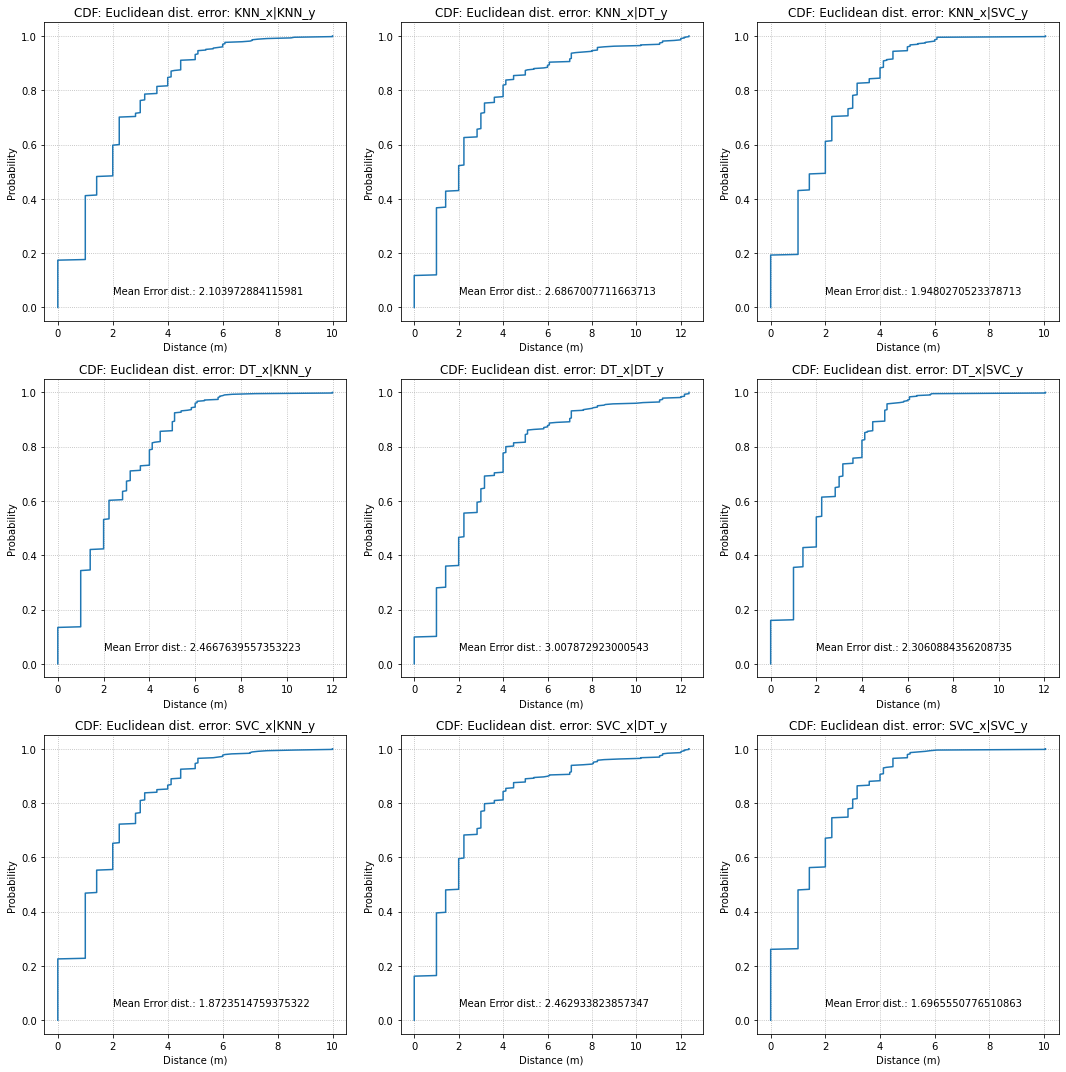

In [16]:
fig, axs = plt.subplots(3, 3, figsize=(15,15))
(ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9) = axs

for ax, px in zip(axs,models_predictions_x):
    for axes, py in zip(ax,models_predictions_y):
        distances = distance(t_test_x, t_test_y, models_predictions_x[px], models_predictions_y[py])
        sorted_distances = np.sort(distances)
        probabilites = 1. * np.arange(len(sorted_distances))/(len(sorted_distances) - 1)
        axes.plot(sorted_distances, probabilites)
        axes.set_title(f'CDF: Euclidean dist. error: {px}|{py}')
        axes.set(xlabel = 'Distance (m)', ylabel = 'Probability')
        axes.text(2,0.05,f"Mean Error dist.: {np.mean(distances)}")
        axes.grid(True)
        gridlines = axes.get_xgridlines() + axes.get_ygridlines()
        for line in gridlines:
            line.set_linestyle(':')

fig.tight_layout()
plt.show()
plt.close()

In [ ]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
import numpy as np
from PIL import Image

image = Image.open("../input/ble-rssi-dataset/iBeacon_Layout.jpg")
init_notebook_mode(connected=True)

xm=np.min(t_test_x)-1.5
xM=np.max(t_test_x)+1.5
ym=np.min(t_test_y)-1.5
yM=np.max(t_test_y)+1.5

data=[dict(x=[0], y=[0], 
           mode="markers", name = "Predictions",
           line=dict(width=2, color='green')
          ),
      dict(x=[0], y=[0], 
           mode="markers", name = "Actual",
           line=dict(width=2, color='blue')
          )
      
    ]

layout=dict(xaxis=dict(range=[xm, 24], autorange=False, zeroline=False),
            yaxis=dict(range=[ym, 21], autorange=False, zeroline=False),
            title='Predictions for SVC', hovermode='closest',
            images= [dict(
                  source= image,
                  xref= "x",
                  yref= "y",
                  x= -3.5,
                  y= 22,
                  sizex= 36,
                  sizey=25,
                  sizing= "stretch",
                  opacity= 0.5,
                  layer= "below")]
            )

frames=[dict(data=[dict(x=[models_predictions_x['SVC_x'][k]], 
                        y=[models_predictions_y['SVC_y'][k]], 
                        mode='markers',
                        
                        marker=dict(color='red', size=10)
                        ),
                   dict(x=[t_test_x.iloc[k]], 
                        y=[t_test_y.iloc[k]], 
                        mode='markers',
                        
                        marker=dict(color='blue', size=10)
                        )
                  ]) for k in range(int(len(t_test_x))) 
       ]    
          
figure1=dict(data=data, layout=layout, frames=frames)          
iplot(figure1)